## The plotting function

In [656]:
def plotting(jlist, df):
    plt.plot(range(len(jlist)),jlist,'-*')
    plt.title('Epochs vs loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    ###___________________
    for i in range(df.shape[1]):
        plt.plot(df.iloc[:,i],jlist[1:],'-*')
        plt.title(f'Theta {i} changes till loss approaches 0')    
        plt.xlabel(f'Theta {i}')
        plt.ylabel('Loss')
        plt.show()

# Task 1:
## Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.metrics import r2_score

In [637]:
df=pd.read_csv('MultiVarLR_project_oz.csv', header=None)

In [638]:
df.head()

,0,1,2,3
0,73.0,80.0,75.0,152.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,90.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0


In [639]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

## The ADAM function is dynamic and can accept a data frame with any shape

In [640]:
def ADAM(X, y, alpha, beta1, beta2, epsilon, iterations):
    y = y.values.reshape(-1, 1)
    ones = np.ones(len(X)).reshape(len(X), 1)
    if isinstance(X, pd.Series):
        X = X.values.reshape(len(X), 1)
    X = np.hstack((ones, X))
    thetas = np.zeros(X.shape[1])
    thetas = thetas.reshape(X.shape[1], 1)
    thetas_df = pd.DataFrame(columns=[f"theta_{i}" for i in range(X.shape[1])])
    jlist = []
    vt = 0
    mt = 0
    tolerence= 0.001
    for i in range(iterations):
        ypredict = np.matmul(X, thetas)
        error_vector = ypredict - y
        j = error_vector.T.dot(error_vector) / (2 * len(X))
        j = j[0][0]
        jlist.append(j)
        # Stop criteria here 
        # I stop if the loss is bigger than the previous results
#         if len(jlist) > 10:
#             if j>jlist[-2]:
#                 if abs(jlist[-1]-jlist[-2]<1):
#                     break
        if len(jlist) > 10:
            if abs(jlist[-1]-jlist[-2])<0.001:
                 break
#         Stop criteria ended
        gradient_vector = (np.matmul(error_vector.T, X) / len(X)).T
        mt = beta1 * mt + (1 - beta1) * gradient_vector
        vt = (beta2 * vt) + (1 - beta2) * (gradient_vector * gradient_vector)
        
        # Apply bias correction to mt and vt
        mt_corrected = mt / (1 - beta1**(i + 1))
        vt_corrected = vt / (1 - beta2**(i + 1))

        thetas = thetas - (alpha / (np.sqrt(vt_corrected) + epsilon)) * mt_corrected
        thetas_df.loc[len(thetas_df)] = thetas.flatten()
        print(f'****************** Iteration {i} ********************\n Loss= {j}')
        print(f'Gradient Vector: {gradient_vector}\n Gradient Vector Norm: {np.linalg.norm(gradient_vector)}')
    return (r2_score(y, ypredict), jlist, thetas_df)

### After several trials with different hyper parameters the below is approximate to the best selection of hyper parameters:

In [641]:
r2score, jlist, thetas_df= ADAM(X,y,0.01,0.7,0.1,0.000001,1000)

****************** Iteration 0 ********************
 Loss= 13405.98
Gradient Vector: [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
 Gradient Vector Norm: 22917.545989219703
****************** Iteration 1 ********************
 Loss= 13010.421858039404
Gradient Vector: [[  -159.63      ]
 [-12881.29920002]
 [-12951.62840002]
 [-13266.95080002]]
 Gradient Vector Norm: 22576.758238499886
****************** Iteration 2 ********************
 Loss= 12618.923389542042
Gradient Vector: [[  -157.20836656]
 [-12685.85951385]
 [-12755.11274468]
 [-13065.85554552]]
 Gradient Vector Norm: 22234.32545281235
****************** Iteration 3 ********************
 Loss= 12231.399937366901
Gradient Vector: [[  -154.77401773]
 [-12489.39362291]
 [-12557.56523464]
 [-12863.70439123]]
 Gradient Vector Norm: 21890.0946400804
****************** Iteration 4 ********************
 Loss= 11848.092667947305
Gradient Vector: [[  -152.32789541]
 [-12291.97754324]
 [-12359.06230446]
 [-12660.5755529 ]]
 Gradient

In [642]:
print(f'r2score= {r2score*100}%')

r2score= 97.32722653470907%


In [643]:
thetas_df

,theta_0,theta_1,theta_2,theta_3
0,0.010000,0.010000,0.010000,0.010000
1,0.020048,0.020048,0.020048,0.020048
2,0.030149,0.030149,0.030149,0.030149
3,0.040299,0.040299,0.040299,0.040299
4,0.050493,0.050493,0.050493,0.050492
...,...,...,...,...
98,0.659963,0.657674,0.656930,0.675296
99,0.661904,0.659541,0.658772,0.677714
100,0.666490,0.664065,0.663277,0.682689
101,0.676034,0.673565,0.672761,0.692451


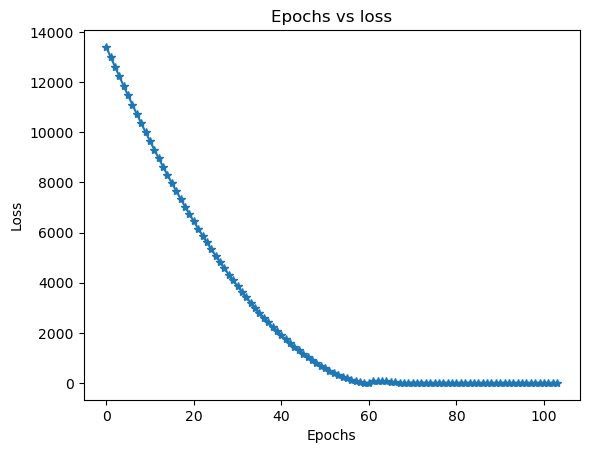

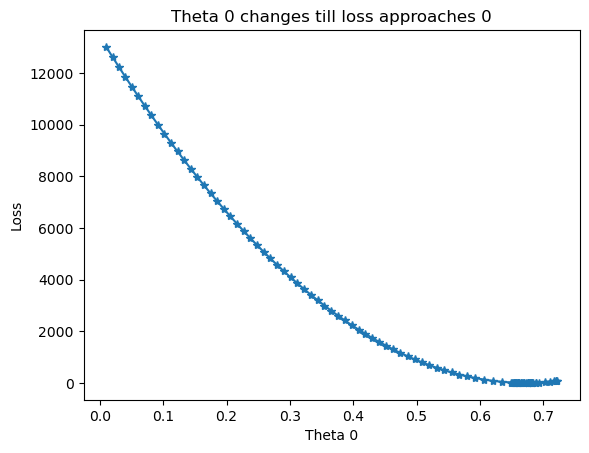

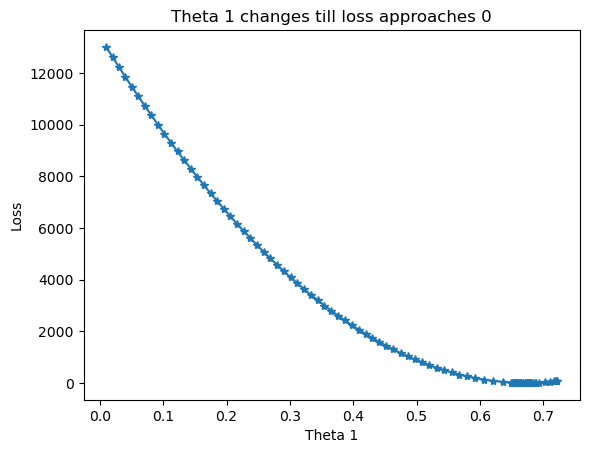

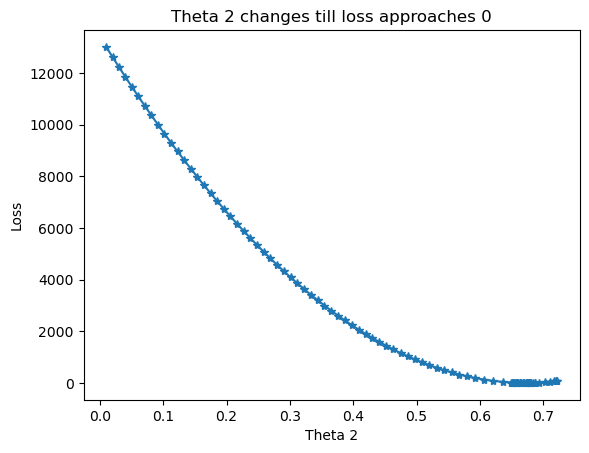

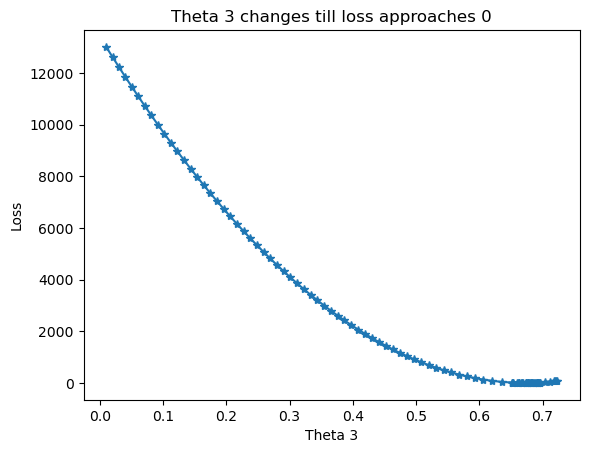

In [644]:
plotting(jlist,thetas_df)

# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

<font color='red'><b><b><i>Notes:</i></b></font>
    
<font color='red'><b><b><i>You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b></font>

<font color='red'><b><i>Any copied code from the internet will be considered as cheeeting</i></b></i></b></font>

<font color='red'><b><i>Any code exchange between trainees will be considered as cheeeting</i></b></font>

## I couldn't implement the BFGS correctly so I had to use a library
##### in the last cell of this notebook. I put my best try at the BFGS implementation

In [645]:
from scipy.optimize import fmin_bfgs

In [646]:
def BFGS(X, y, max_iterations, eps):
    ones = np.ones(len(X)).reshape(len(X), 1)
    if isinstance(X, pd.Series):
        X = X.values.reshape(len(X), 1)
    X = np.hstack((ones, X))
    thetas = np.zeros(X.shape[1])
    thetas_list = [thetas]
    jlist = []
    def cost(thetas, X, y):
        ypredict = np.matmul(X, thetas)
        error_vector = ypredict - y
        j = error_vector.T.dot(error_vector) / (2 * len(X))
        return j

    def gradient(thetas, X, y):
        ypredict = np.matmul(X, thetas)
        error_vector = ypredict - y
        gradient_vector = (np.matmul(error_vector.T, X) / len(X)).T
        return gradient_vector

    for i in range(max_iterations):
        gradient_vector = gradient(thetas, X, y)  
        # I couldn't implement the algorithm manually. I know using a built in function doesn't count.
        #it should've been something like that (thetas = thetas- learning_rate*b_inverse*gradient)
        thetas = fmin_bfgs(cost, thetas, fprime=gradient, args=(X, y), maxiter=1, disp=False)

        thetas_list.append(thetas)
        j = cost(thetas, X, y)
        jlist.append(j)
        print(f'****************** Iteration {i} ********************\n Loss= {j}')
        print(f'Gradient Vector: {gradient_vector}\n Gradient Vector Norm: {np.linalg.norm(gradient_vector)}')
        print(f'thetas : {thetas}')
        print('\n')
        #stopping criteria starts 
        if i > 0 and abs(jlist[-1] - jlist[-2]) < eps:
            break
        #stopping criteria ends
    thetas_df = pd.DataFrame(thetas_list, columns=['theta' + str(i) for i in range(X.shape[1])])

    return (r2_score(y, np.matmul(X, thetas)), jlist,thetas_df)

In [647]:
r2score, jlist, thetas_df=BFGS(X, y,1000,0.1)

****************** Iteration 0 ********************
 Loss= 254.90139898432855
Gradient Vector: [  -162.04 -13075.8  -13147.2  -13467.08]
 Gradient Vector Norm: 22917.545989219703
thetas : [0.00714127 0.57626406 0.57941073 0.59350817]


****************** Iteration 1 ********************
 Loss= 5.868682912317746
Gradient Vector: [  -22.07433736 -1779.02533291 -1788.26091129 -1843.19653575]
 Gradient Vector Norm: 3124.2069342079476
thetas : [0.00826768 0.6670438  0.67066174 0.68756243]


****************** Iteration 2 ********************
 Loss= 3.215606682039678
Gradient Vector: [ 0.01819151  4.07883571  4.6524488  -8.45083291]
 Gradient Vector Norm: 10.473733254825628
thetas : [0.00738775 0.46975023 0.44562247 1.0963298 ]


****************** Iteration 3 ********************
 Loss= 3.187156783111958
Gradient Vector: [ -0.1565275  -17.57585024 -20.3630527  -19.69390648]
 Gradient Vector Norm: 33.3382495081104
thetas : [0.00739576 0.47065003 0.44666495 1.09733802]




In [648]:
thetas_df

,theta0,theta1,theta2,theta3
0,0.000000,0.000000,0.000000,0.000000
1,0.007141,0.576264,0.579411,0.593508
2,0.008268,0.667044,0.670662,0.687562
3,0.007388,0.469750,0.445622,1.096330
4,0.007396,0.470650,0.446665,1.097338


In [649]:
print(f'r2score= {r2score*100}%')

r2score= 98.8514717220403%


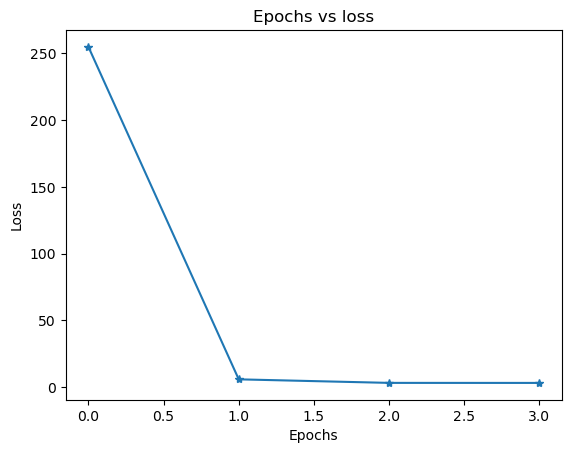

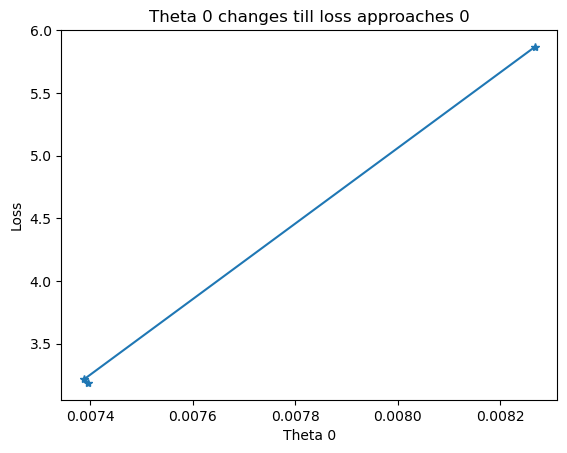

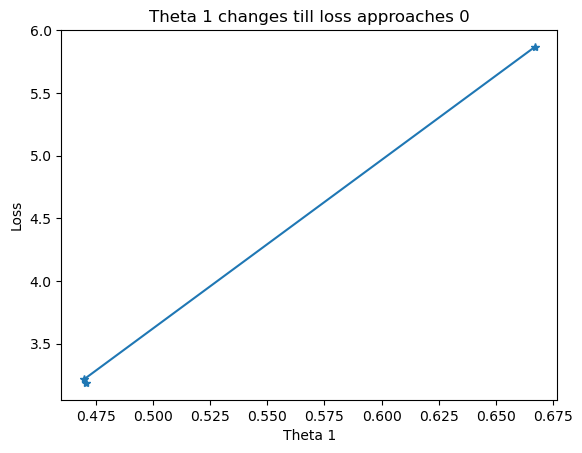

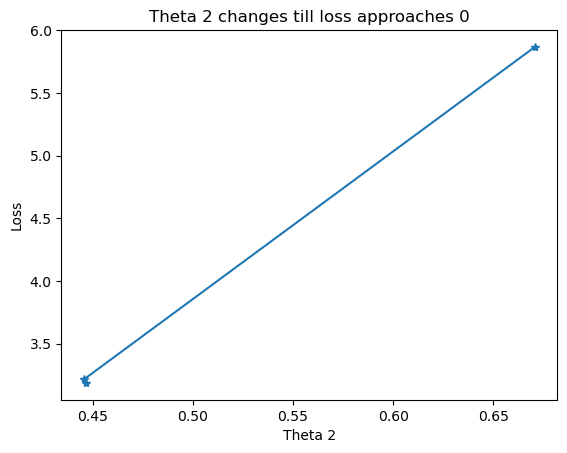

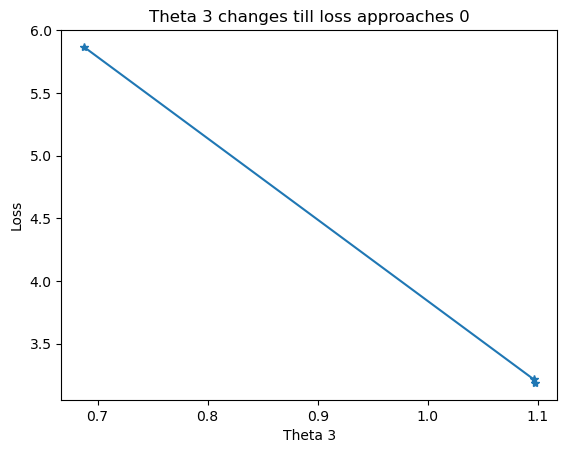

In [650]:
plotting(jlist,thetas_df.iloc[2:,:])

# Conclusion:

### BFGS converged extremely faster. BFGS will always converge convex loss functions faster than first-order optimization techniques.

## The code below is my implemetation without the help of the function fmin_bfgs:
(it doesn't converge) 

In [683]:
def BFGS(X, y, max_iterations, eps, learning_rate):
    ones = np.ones(len(X)).reshape(len(X), 1)
    if isinstance(X, pd.Series):
        X = X.values.reshape(len(X), 1)
    X = np.hstack((ones, X))
    thetas = np.zeros(X.shape[1])
    thetas_list = [thetas]
    jlist = []

    def cost(thetas, X, y):
        ypredict = np.matmul(X, thetas)
        error_vector = ypredict - y
        j = error_vector.T.dot(error_vector) / (2 * len(X))
        return j

    def gradient(thetas, X, y):
        ypredict = np.matmul(X, thetas)
        error_vector = ypredict - y
        gradient_vector = (np.matmul(X.T, error_vector) / len(X))
        return gradient_vector
    
    def update_b_inverse(B_inv, s, yy):
        rho = 1 / np.matmul(yy.T, s)
        I = np.eye(B_inv.shape[0])
        x1= (I - rho * np.matmul(s,yy.T))
        x2= np.matmul(B_inv,(I - rho * np.matmul(yy,s.T)))
        B_inv_new = np.matmul(x1, x2) + (rho * np.matmul(s,s.T))
        print(I.shape)
        return B_inv_new
        
# #         return B_inv_new
#     def update_b_inverse(B_inv, s, yy):
#         rho = 1 / (yy.T @ s)
#         I = np.eye(B_inv.shape[0])
#         f_exp = I - ((s @ yy.T) * rho)
#         s_exp = B_inv @ (I - ((yy @ s.T) * rho))
#         t_exp = ((s @ s.T) * rho)
#         B_inv_new = (f_exp @ s_exp) + t_exp
#         return B_inv_new

    B_inv = np.eye(X.shape[1])

    for i in range(max_iterations):
        gradient_vector = gradient(thetas, X, y)
        thetas_new = thetas-(learning_rate * np.matmul(B_inv, gradient_vector))
        s = thetas_new - thetas
        yy = gradient(thetas_new, X, y) - gradient_vector
        B_inv = update_b_inverse(B_inv, s, yy)
        thetas = thetas_new
        thetas_list.append(thetas)
        j = cost(thetas, X, y)
        jlist.append(j)

        print(f'****************** Iteration {i} ********************\n Loss= {j}')
        print(f'Gradient Vector: {gradient_vector}\n Gradient Vector Norm: {np.linalg.norm(gradient_vector)}')
        print(f'thetas : {thetas}\n')

        if i > 0 and abs(jlist[-1] - jlist[-2]) < eps:
            break

    thetas_df = pd.DataFrame(thetas_list, columns=['theta' + str(i) for i in range(X.shape[1])])

    return (r2_score(y, np.matmul(X, thetas)), jlist, thetas_df)

### After several trials these set of hyper parameters converged 

In [684]:
r2score, jlist, thetas_df=BFGS(X, y,100,0.0001,0.5)

(4, 4)
****************** Iteration 0 ********************
 Loss= 1286339382939.925
Gradient Vector: [  -162.04 -13075.8  -13147.2  -13467.08]
 Gradient Vector Norm: 22917.545989219703
thetas : [  81.02 6537.9  6573.6  6733.54]

(4, 4)
****************** Iteration 1 ********************
 Loss= 6.134979476678863e+21
Gradient Vector: [1.58779316e+06 1.28152445e+08 1.28857649e+08 1.31863208e+08]
 Gradient Vector Norm: 224539016.21680835
thetas : [-3.91264874e+08 -4.54540743e+08 -4.54893309e+08 -4.56395929e+08]

(4, 4)
****************** Iteration 2 ********************
 Loss= 2.2264797399415715e+33
Gradient Vector: [-1.09660226e+11 -8.85029164e+12 -8.89901297e+12 -9.10642029e+12]
 Gradient Vector Norm: 15506740786802.957
thetas : [2.69715333e+14 2.74085586e+14 2.74109946e+14 2.74213648e+14]

(4, 4)
****************** Iteration 3 ********************
 Loss= 6.498919888736566e+46
Gradient Vector: [6.60626266e+16 5.33163802e+18 5.36099050e+18 5.48592471e+18]
 Gradient Vector Norm: 9.34164424

C:\Users\omar6\AppData\Local\Temp\ipykernel_6936\811383049.py:23: RuntimeWarning: overflow encountered in matmul
  rho = 1 / np.matmul(yy.T, s)
C:\Users\omar6\AppData\Local\Temp\ipykernel_6936\811383049.py:25: RuntimeWarning: overflow encountered in matmul
  x1= (I - rho * np.matmul(s,yy.T))
C:\Users\omar6\AppData\Local\Temp\ipykernel_6936\811383049.py:25: RuntimeWarning: invalid value encountered in double_scalars
  x1= (I - rho * np.matmul(s,yy.T))
C:\Users\omar6\AppData\Local\Temp\ipykernel_6936\811383049.py:26: RuntimeWarning: overflow encountered in matmul
  x2= np.matmul(B_inv,(I - rho * np.matmul(yy,s.T)))
C:\Users\omar6\AppData\Local\Temp\ipykernel_6936\811383049.py:26: RuntimeWarning: invalid value encountered in double_scalars
  x2= np.matmul(B_inv,(I - rho * np.matmul(yy,s.T)))
C:\Users\omar6\AppData\Local\Temp\ipykernel_6936\811383049.py:27: RuntimeWarning: overflow encountered in matmul
  B_inv_new = np.matmul(x1, x2) + (rho * np.matmul(s,s.T))
C:\Users\omar6\AppData\Local

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

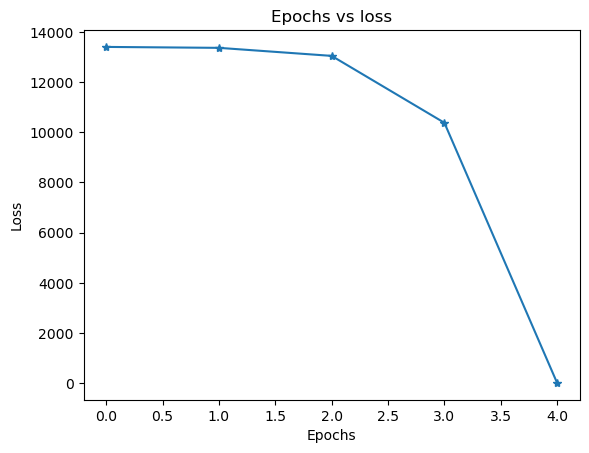

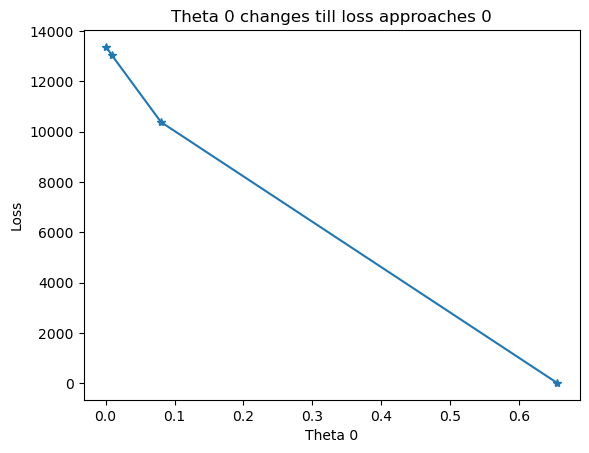

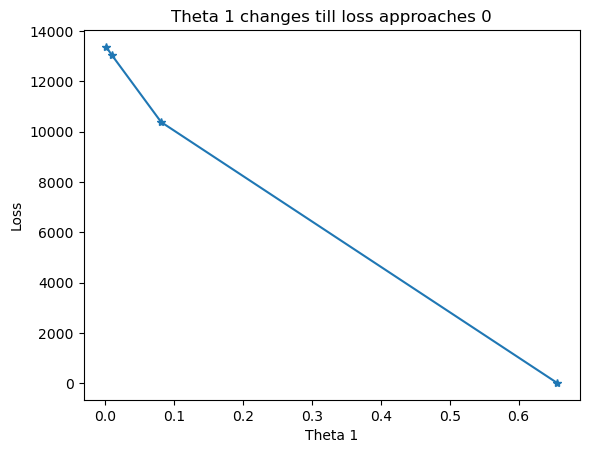

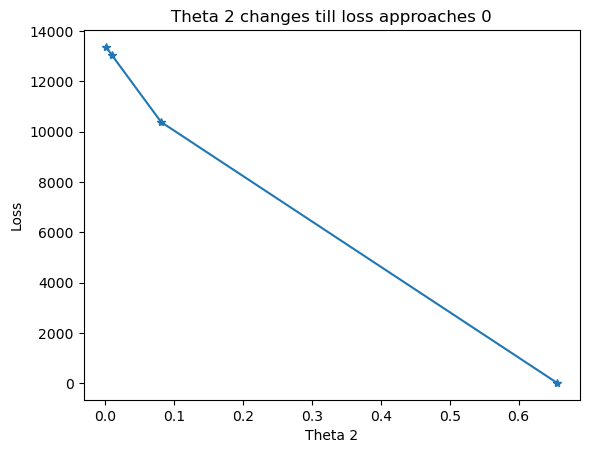

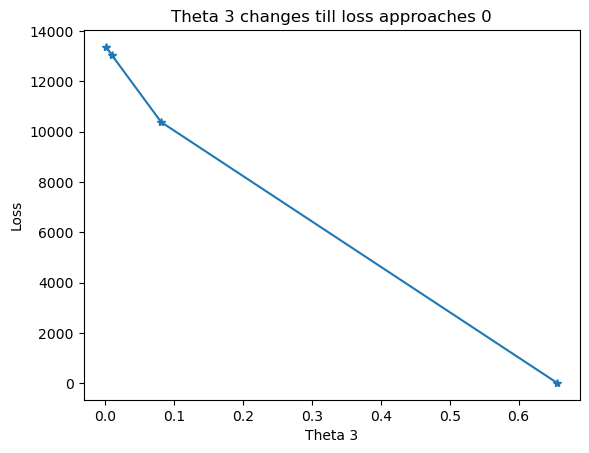

In [653]:
plotting(jlist,thetas_df.iloc[2:,:])

In [654]:
#again the implementation above is not working correctly

In [655]:
print(f'r2score= {r2score*100}%')

r2score= 94.9133085000121%


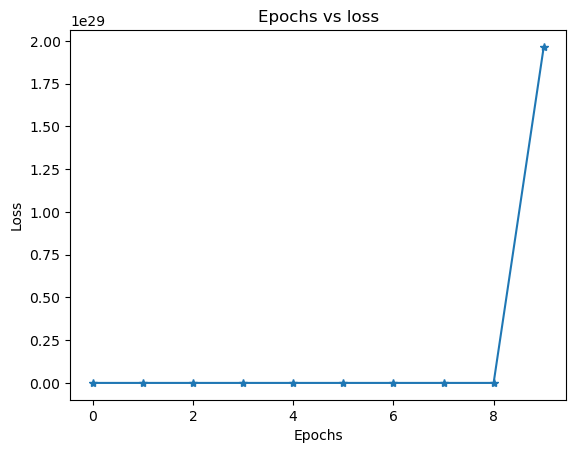

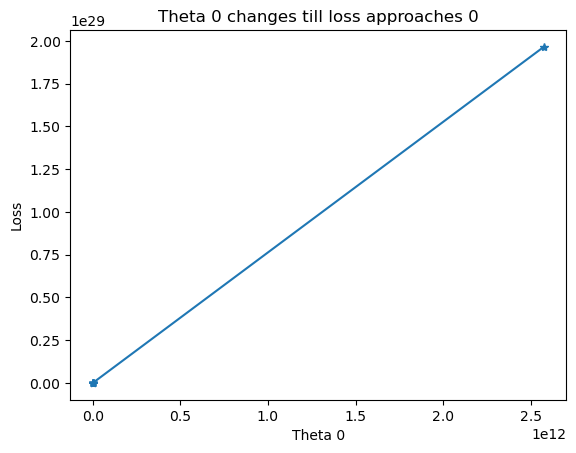

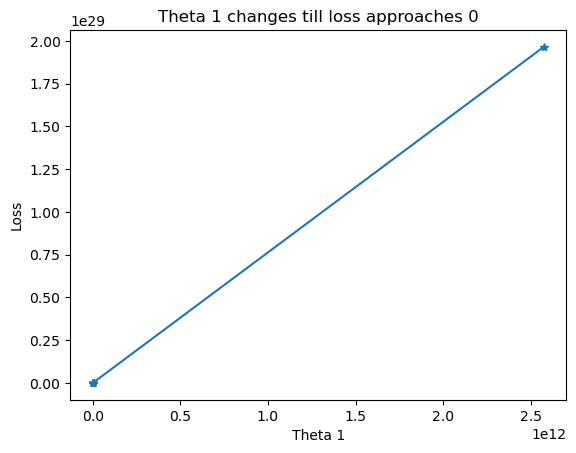

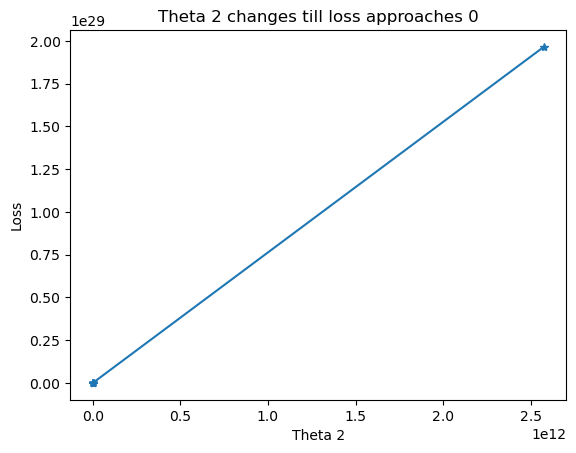

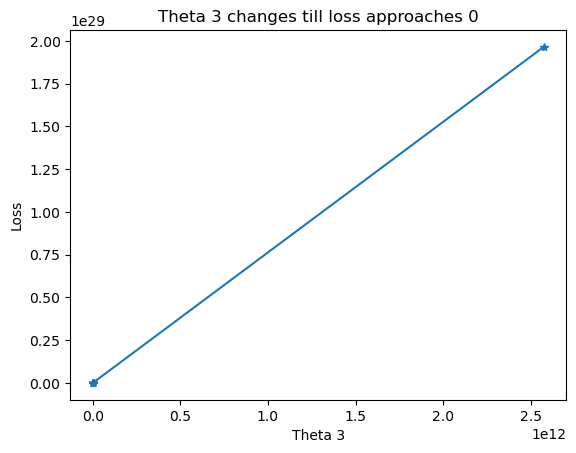

In [626]:
# this is how it looks when it's diverging